# CS 1656 – Introduction to Data Science (Spring 2020) 

## Instructor: Alexandros Labrinidis and Evangelos Karageorgos /Teaching Assistant: Xiaoting Li

## Term Project 

**Released: March 23, 2020**

**Due: April 21, 2020**

In [1]:
# Your name: Brandon Bisceglia
# Your github ID: BetterBrandon
# Your pitt username: brb162

### Goal
The goal of this project is to expose you with a real data science problem, looking at the end-to-end pipeline. 

### What to do 
You are asked to write a Python Jupyter notebook, called `pgh_bike.ipynb` that will:
* [Task 1] access historical bike rental data for 2019 from HealthyRidePGH and summarize the rental data  
* [Task 2] create graphs to show the popularity of the different rental stations, given filter conditions  
* [Task 3] create graphs to show the rebalancing issue  

**Your program should not take more than 15 minutes to run**

### Jupyter Notebook Rules
This skeleton is provided for you to complete the project. Please add your code in the code cells below each Task. Feel free to add cells as needed. Do not remove existing cells.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import datetime
import time
import math

# Feel free to add here any other libraries as specified in the project description

For the sake of interactive display in Jupyter, we will enable matplotlib inline.

In [3]:
%matplotlib inline

### [Task 0] Warming Up
Task 0 is for testing. It is used to ensure that this Jupyter Notebook skeleton works on both your machines and our machine. Please run the following code to see if you can see a line plot. The line plot is the basic plot that we have seen in Recitation2. 

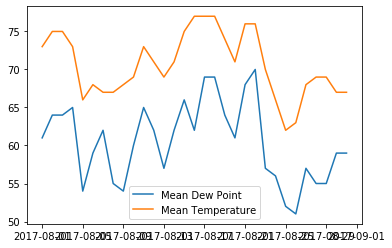

In [4]:
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df = pd.read_csv('http://data.cs1656.org/KPIT_Aug17.csv',\
                       sep=',', engine='python', parse_dates=['EST'])
p1 = plt.plot(df['EST'],df['MeanDew PointF'])
p2 = plt.plot(df['EST'],df['Mean TemperatureF'])
plt.legend([p1[0],p2[0]], ['Mean Dew Point', 'Mean Temperature'])

plt.show()

--- 
Add your code below this line

---
### Task 1

In this task you will need to access historical bike rental data for 2019 from HealthyRidePGH and summarize the rental data.

In [5]:
# Code for functions
# Could use this for the month part
# a = index.split()
# b = a[0].split("/")

def count_for_days(frame):
    current_day = ""
    from_station = ""
    to_station = ""
    stop_time = ""

    from_list = []
    to_list = []

    col = frame.iloc(0)
    prev_day = col[0][10]
    #print(f"prev day: {prev_day}")

    output = {"Date":[], "StationID":[], "fromCNT":[], "toCNT":[], "rebalCNT*":[]}
    #days_count = pd.DataFrame(output)
    today_count = pd.DataFrame(output)
    
    counter = 1

    index_tracker = 0


    for index, row in frame.iterrows():
        current_day = row["StartDate"]
        #print(f" current day: {current_day}")

        # if counter % 5000 == 0:
        #     print(f"Counter Progress: {counter}")

        index_finder = {}

        if prev_day != current_day:
            #print(f"prev {prev_day} current: {current_day}")
            while len(from_list) != 0 and len(to_list) != 0:

                #print(f"printing values from index_tracker on: {today_count.loc[index_tracker:, 'StationID'].values}")
                index_tracker_frame = today_count.loc[index_tracker:, "StationID"].values
                #print(f"Here is the index tracker frame: {index_tracker_frame} and length: {len(index_tracker_frame)}")

                station_from = from_list.pop(0)
                #print(f"Station FROM being popped: {station_from}")
                station_to = to_list.pop(0)
                #print(f"Station TO being popped: {station_to}")

                if math.isnan(station_from) or math.isnan(station_to):
                    continue
                
                if station_from == station_to:
                    if station_to not in index_finder.keys():
                        s = [prev_day, station_to, 1, 1, 0] 
                        today_count = today_count.append(pd.Series(s, index=today_count.columns), ignore_index=True)
                        index_finder[station_to] = len(today_count.index) - 1 
                        #print("for this transcation, station_from and station_to are the same location")
                    else:
                        station_index = index_finder[station_from]
                        today_count.at[station_index, "fromCNT"] += 1 
                        today_count.at[station_index, "toCNT"] += 1 

                else:
                    if station_from not in index_tracker_frame:
                        s = [prev_day, station_from, 1, 0, 0] 
                        today_count = today_count.append(pd.Series(s, index=today_count.columns), ignore_index=True)
                        index_finder[station_from] = len(today_count.index) - 1 
                        # display(today_count)
                    else:
                        station_index = index_finder[station_from]
                        # print(today_count.loc[station_index]["fromCNT"] )
                        today_count.at[station_index, "fromCNT"] += 1 
                    

                    if station_to not in index_tracker_frame:
                        s = [prev_day, station_to, 0, 1, 0] 
                        today_count = today_count.append(pd.Series(s, index=today_count.columns), ignore_index=True)
                        index_finder[station_to] = len(today_count.index) - 1 
                        
                    else:
                        station_index = index_finder[station_to]
                        # print(today_count.loc[station_index]["fromCNT"] )
                        today_count.at[station_index, "toCNT"] += 1 

            prev_day = current_day
            index_tracker = len(today_count.index) 
            #print(f"this is the index tracker: {index_tracker}")
            
        counter += 1    

        from_list.append(row["From station id"])
        to_list.append(row["To station id"])
        stop_time = row["Stoptime"]

    for index, row in today_count.iterrows():
        rebalCNT = row["fromCNT"] - row["toCNT"]
        if rebalCNT > 0:
            today_count.at[index, "rebalCNT*"] = rebalCNT



    return today_count
        

### Task 1.1

In [6]:
# Get HealthyRide csv files from the directory
start = time.time()
files = glob.glob("*.csv")
#print(files)

l = []

# Load all the csv files into one dataframe
for f in files:
    df = pd.read_csv(f, index_col=None, header=0)
    l.append(df)

csvs_frame = pd.concat(l, axis=0, ignore_index=True)

csvs_frame["Starttime"] = pd.to_datetime(csvs_frame['Starttime'])
csvs_frame["StartDate"] = csvs_frame['Starttime'].dt.date
csvs_frame["Stoptime"] = pd.to_datetime(csvs_frame['Stoptime'])
csvs_frame["StopDate"] = csvs_frame['Stoptime'].dt.date

#csvs_frame["test"] = datetime.datetime.date(csvs_frame['Starttime']) 
csvs_frame.sort_values(by=['Starttime'], inplace=True)
#display(csvs_frame)
# print(len(csvs_frame.index)

# test = csvs_frame[:5000]
# Printing output of frame, top 20
day_count = count_for_days(csvs_frame)

display(day_count.head(20))

,Date,StationID,fromCNT,toCNT,rebalCNT*
0,2019-01-01,49731.0,2.0,0.0,2.0
1,2019-01-01,1047.0,0.0,2.0,0.0
2,2019-01-01,1010.0,1.0,1.0,0.0
3,2019-01-01,1060.0,0.0,2.0,0.0
4,2019-01-01,1033.0,4.0,3.0,1.0
5,2019-01-01,1069.0,1.0,1.0,0.0
6,2019-01-01,49601.0,1.0,0.0,1.0
7,2019-01-01,1022.0,0.0,1.0,0.0
8,2019-01-01,1045.0,2.0,2.0,0.0
9,2019-01-01,1012.0,4.0,3.0,1.0


### Task 1.2

In [7]:
a = ["1/1/2019", "2/1/2019", "3/1/2019", "4/1/2019", "5/1/2019", "6/1/2019", "7/1/2019", "8/1/2019", "9/1/2019", "10/1/2019"]
t = [datetime.datetime.strptime(x, '%m/%d/%Y') for x in a]
month_list = [datetime.datetime.date(x) for x in t] 
#print(month_list[0])

output = {"Date":[], "StationID":[], "fromCNT":[], "toCNT":[], "rebalCNT*":[]}
month_count = pd.DataFrame(output)

# row = day_count.iloc(0)
# current_day = row[0][0]
# #print(current_day)
i = 1

month_index ={}
index_tracker = 0

# test = ["test"]
# print(test[1])

for index, row in day_count.iterrows():
    current_day = row[0]


    if current_day < month_list[i]:
        #print(current_day)
        index_tracker_frame = month_count.loc[index_tracker:, "StationID"].values

        if row[1] not in index_tracker_frame:
            s = [month_list[i-1], row[1], row[2], row[3], row[4]] 
            month_count = month_count.append(pd.Series(s, index=month_count.columns), ignore_index=True)
            month_index[row[1]] = len(month_count.index) - 1 
        else:
            station_index = month_index[row[1]]
            # print(today_count.loc[station_index]["fromCNT"] )
            month_count.at[station_index, "fromCNT"] += row[2]
            month_count.at[station_index, "toCNT"] += row[3]
            month_count.at[station_index, "rebalCNT*"] += row[4]

    # This is where we reset the month_index and update the index position
    else:
        index_tracker = len(month_count.index)
        month_index.clear()
        i += 1
        
# Printing output of dataframe, top 20
display(month_count.head(20))
# end = time.time()

# day_count.to_csv("C:/Users/Brandon/Desktop/day_count.csv")
# month_count.to_csv("C:/Users/Brandon/Desktop/month_count.csv")
# csvs_frame.to_csv("C:/Users/Brandon/Desktop/csvs_frame.csv")

# print(f"Time elapsed: {end - start}")

,Date,StationID,fromCNT,toCNT,rebalCNT*
0,2019-01-01,49731.0,27.0,7.0,20.0
1,2019-01-01,1047.0,29.0,35.0,10.0
2,2019-01-01,1010.0,44.0,49.0,11.0
3,2019-01-01,1060.0,10.0,15.0,4.0
4,2019-01-01,1033.0,38.0,32.0,15.0
5,2019-01-01,1069.0,7.0,2.0,6.0
6,2019-01-01,49601.0,4.0,9.0,3.0
7,2019-01-01,1022.0,20.0,10.0,13.0
8,2019-01-01,1045.0,25.0,33.0,5.0
9,2019-01-01,1012.0,16.0,20.0,1.0


---
### Task 2

In this task you will need to create graphs to show the popularity of the different rental stations, given filter conditions.

In [8]:
# FILTER VARIABLES -- feel free to edit the values, but the names of the variables must remain 
# as they are and should be used by your code accordingly from this point on
filter_month = 4
filter_stationID = 1046

# Error handling for getting proper input 
try:
    filter_month = int(input("Enter a month you would like to filter by: "))
except ValueError:
    print("You gave an incorrect input, default month is 4 - April")
    filter_month = 4

if filter_month > 9 or filter_month < 1:
    print("You gave an incorrect input, default month is 4 - April")
    filter_month = 4

try:
    filter_stationID = int(input("Enter a station you would like to filter by: "))
except ValueError:
    print("You gave an incorrect input, default station is 1046")
    filter_stationID = 1046

if filter_stationID not in month_count["StationID"].values:
    print("You gave an incorrect input, default station is 1046")
    filter_stationID = 1046

month_dict = {1:"January", 2:"February", 3:"March", 4:"April",
    5:"May", 6:"June", 7:"July", 8:"August", 9:"September"}



You gave an incorrect input, default month is 4 - April
You gave an incorrect input, default station is 1046


### Task 2.1

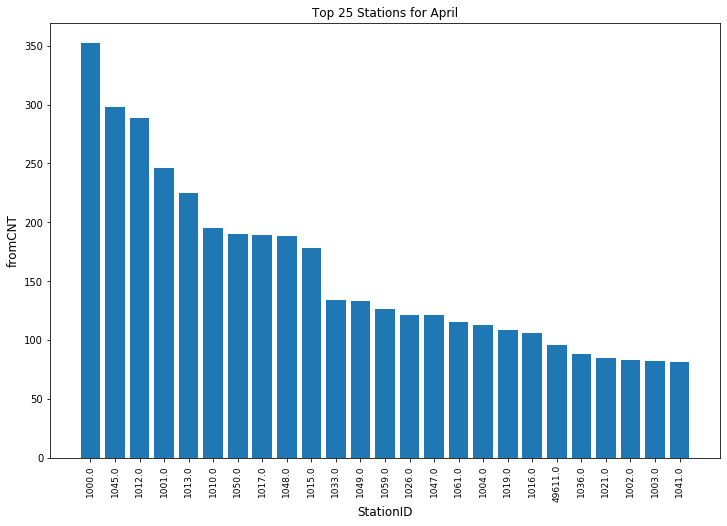

In [9]:
#display(month_count)
#Get top 25 fromCNT from the input month
top_fromCNT = month_count.sort_values(by=['fromCNT'], ascending=False)
top_fromCNT.set_index("Date", inplace=True)
filter_by_month = top_fromCNT.loc[datetime.date(year=2019,month=filter_month,day=1)]
#display(final_top1)
final_top = filter_by_month.head(25)
#display(final_top)

# Display the graph 
fig = plt.figure(figsize=(12,8))
plt.bar(range(len(final_top["StationID"])), final_top["fromCNT"], align="center")

plt.xticks(range(len(final_top["StationID"])), final_top["StationID"], rotation = 90, fontsize = 9)
plt.xlabel("StationID", fontsize = 12)
plt.ylabel("fromCNT", fontsize = 12)
plt.title(f"Top 25 Stations for {month_dict[filter_month]}")

plt.savefig("Top25_Stations_By_Month.png")
plt.show()



### Task 2.2

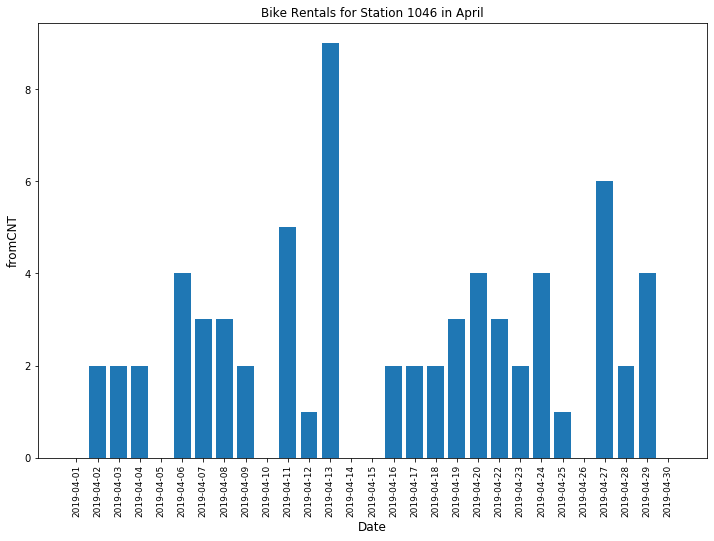

In [10]:
station = day_count.set_index(["StationID", "Date"])
filter_station_date_range = station.loc[filter_stationID][datetime.date(year=2019,month=filter_month,day=1):datetime.date(year=2019,month=(filter_month+1),day=1)]

# Some date ranges included the next month's first day in with filter month data
# This removes the row not a part of filter month
cutoff = datetime.date(year=2019, month=(filter_month+1),day=1)
if cutoff in filter_station_date_range.index:
    filter_station_date_range = filter_station_date_range.head(-1)

filter_station_date_range.reset_index(level="Date", inplace=True)
#display(filter_station_date_range)

fig = plt.figure(figsize=(12,8))
plt.bar(range(len(filter_station_date_range["Date"])), filter_station_date_range["fromCNT"], align="center")

plt.xticks(range(len(filter_station_date_range["Date"])), filter_station_date_range["Date"].dt.strftime('%Y-%m-%d'), rotation = 90, fontsize = 9)
plt.xlabel("Date", fontsize = 12)
plt.ylabel("fromCNT", fontsize = 12)
plt.title(f"Bike Rentals for Station {filter_stationID} in {month_dict[filter_month]}")

plt.savefig("Bike_Rentals_For_Month.png")
plt.show()


### Task 2.3

### Task 2.4

In [11]:
bike_frame = csvs_frame[["Bikeid", "StartDate","Trip id"]]
b = bike_frame.groupby(["Bikeid", "StartDate"])["Trip id"].count().reset_index()


# b_sorted= b.sort_values(by=['Trip id'], ascending=False)
# b1 = b_sorted.set_index("StartDate")

display(b.head(20))

# a = t.groupby(b["StartDate"].dt.strftime("%B"))["Trip id"].sum()
# b["Group"] = b["StartDate"].apply( lambda b : 
# datetime.datetime(year=b.year, month=b.month, day=b.day))	

# a = b.groupby(by=["Bikeid", b.index.month, b.index.year])["Trip id"].count()
# b1_date_range = b1.loc[datetime.date(year=2019,month=filter_month,day=1):datetime.date(year=2019, month=4, day = 15)]

# display(b1_date_range.head(20))
# display(b["StartDate"])


,Bikeid,StartDate,Trip id
0,20135,2019-07-03,2
1,70000,2019-01-15,1
2,70000,2019-02-18,1
3,70000,2019-02-27,1
4,70000,2019-03-12,1
5,70000,2019-03-13,1
6,70000,2019-03-17,1
7,70000,2019-03-20,2
8,70000,2019-03-21,1
9,70000,2019-03-23,1


---
### Task 3

In this task you will create graphs to show the rebalancing issue.

### Task 3.1

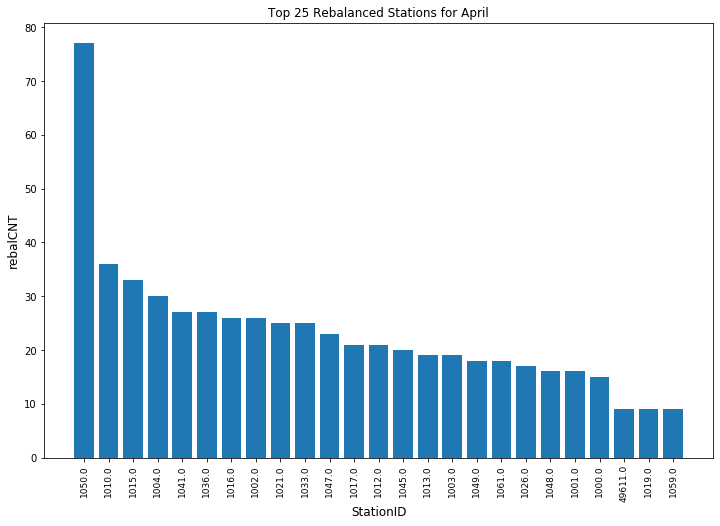

In [12]:
top_rebalCNT = month_count
top_rebalCNT.set_index("Date", inplace=True)
filter_by_month_rebal = top_fromCNT.loc[datetime.date(year=2019,month=filter_month,day=1)]
#display(filter_by_month_rebal)
final_top_rebal = filter_by_month_rebal.head(25)
final_top_rebal = final_top_rebal.sort_values(by=['rebalCNT*'], ascending=False)
#display(final_top_rebal)

# Display the graph 
fig = plt.figure(figsize=(12,8))
plt.bar(range(len(final_top_rebal["StationID"])), final_top_rebal["rebalCNT*"], align="center")

plt.xticks(range(len(final_top_rebal["StationID"])), final_top_rebal["StationID"], rotation = 90, fontsize = 9)
plt.xlabel("StationID", fontsize = 12)
plt.ylabel("rebalCNT", fontsize = 12)
plt.title(f"Top 25 Rebalanced Stations for {month_dict[filter_month]}")

plt.savefig("Top25_rebalStations_By_Month.png")
plt.show()

### Task 3.2

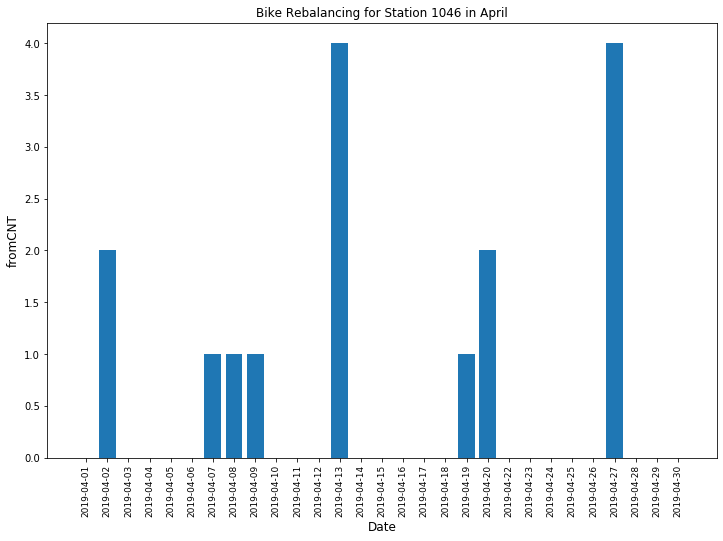

In [13]:
# rebal = day_count.set_index(["StationID", "Date"])
# filter_station_date_range_rebal = station.loc[filter_stationID][datetime.date(year=2019,month=filter_month,day=1):datetime.date(year=2019,month=(filter_month+1),day=1)]

# Some date ranges included the next month's first day in with filter month data
# This removes the row not a part of filter month
# cutoff = datetime.date(year=2019, month=(filter_month+1),day=1)
# if cutoff in filter_station_date_range.index:
#     filter_station_date_range = filter_station_date_range.head(-1)

# filter_station_date_range.reset_index(level="Date", inplace=True)
#display(filter_station_date_range)

fig = plt.figure(figsize=(12,8))
plt.bar(range(len(filter_station_date_range["Date"])), filter_station_date_range["rebalCNT*"], align="center")

plt.xticks(range(len(filter_station_date_range["Date"])), filter_station_date_range["Date"].dt.strftime('%Y-%m-%d'), rotation = 90, fontsize = 9)
plt.xlabel("Date", fontsize = 12)
plt.ylabel("fromCNT", fontsize = 12)
plt.title(f"Bike Rebalancing for Station {filter_stationID} in {month_dict[filter_month]}")

plt.savefig("Bike_Rebalancing_For_Month.png")
plt.show()
